In [1]:
from fastai.vision import *
import cv2
import os
import glob
from tqdm import tqdm_notebook

print(torch.cuda.is_available())
print(os.getcwd())
torch.cuda.empty_cache()

True
/home/ltbd78


In [2]:
import fastai
defaults.device
# torch.device('cpu')

device(type='cuda')

In [3]:
labels = pd.read_csv('list_attr_celeba.csv')
labels.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [7]:
labels.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [8]:
os.chdir('/home/ltbd78/faces')
path = os.getcwd()
extracted_faces = glob.glob('*.jpg')
extracted_faces.sort()

A = set(extracted_faces)
slices = []
for i in labels.loc[:, 'image_id']:
    if i in A:
        slices.append(True)
    else:
        slices.append(False)

attr = labels.loc[slices, ['image_id', 'Attractive', 'Bags_Under_Eyes', 'Bangs', 'Chubby', 'Eyeglasses', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Smiling', 'Wearing_Lipstick', 'Young']]
attr.head()

,image_id,Attractive,Bags_Under_Eyes,Bangs,Chubby,Eyeglasses,Male,Mouth_Slightly_Open,Mustache,Smiling,Wearing_Lipstick,Young
0,000001.jpg,1,-1,-1,-1,-1,-1,1,-1,1,1,1
1,000002.jpg,-1,1,-1,-1,-1,-1,1,-1,1,-1,1
4,000005.jpg,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1
5,000006.jpg,1,-1,-1,-1,-1,-1,1,-1,-1,1,1
6,000007.jpg,1,1,-1,-1,-1,1,-1,-1,-1,-1,1


In [9]:
tfms = get_transforms(do_flip=True, flip_vert=False,
                      p_affine=.75, p_lighting=.75,
                      max_lighting=.2, max_rotate=10, max_warp=.2, max_zoom=1.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.427086,0.408855,0.800650,16:53
1,0.397562,0.370935,0.820273,17:08
2,0.388250,0.368081,0.825822,17:06


Label: -1
Prediction: (Category -1, tensor(0), tensor([0.9890, 0.0110]))


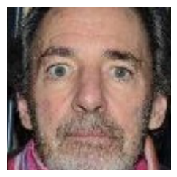

In [10]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=1)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(3)

learn.save('/home/ltbd78/models/attractive_resnet50')
learn.export('/home/ltbd78/models/attractive_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

epoch,train_loss,valid_loss,accuracy,time
0,0.360581,0.337404,0.843010,17:03
1,0.349528,0.324028,0.847882,17:01
2,0.349950,0.322823,0.850589,17:02


Label: -1
Prediction: (Category -1, tensor(0), tensor([0.6020, 0.3980]))


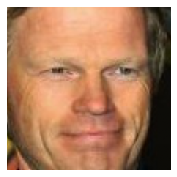

In [6]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=2)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(3)

learn.save('/home/ltbd78/models/bags_under_eyes_resnet50')
learn.export('/home/ltbd78/models/bags_under_eyes_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

epoch,train_loss,valid_loss,accuracy,time
0,0.124395,0.095573,0.959128,17:04
1,0.105302,0.093628,0.962106,17:03
2,0.098960,0.088322,0.964677,17:03


Label: -1
Prediction: (Category -1, tensor(0), tensor([0.9857, 0.0143]))


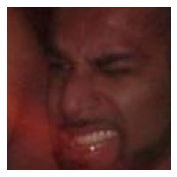

In [7]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=3
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(3)

learn.save('/home/ltbd78/models/bangs_resnet50')
learn.export('/home/ltbd78/models/bangs_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

In [11]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=4)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(3)

learn.save('/home/ltbd78/models/chubby_resnet50')
learn.export('/home/ltbd78/models/chubby_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

epoch,train_loss,valid_loss,accuracy,time
0,0.132368,0.120742,0.953986,17:07


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



epoch,train_loss,valid_loss,accuracy,time
0,0.015760,0.014030,0.997023,17:06
1,0.008233,0.017554,0.997699,17:04
2,0.017737,0.014836,0.996752,17:04


Label: -1
Prediction: (Category -1, tensor(0), tensor([9.9985e-01, 1.5488e-04]))


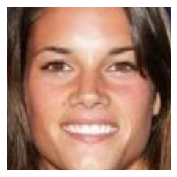

In [8]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=5)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(3)

learn.save('/home/ltbd78/models/eyeglasses_resnet50')
learn.export('/home/ltbd78/models/eyeglasses_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

In [9]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=6)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(3)

learn.save('/home/ltbd78/models/male_resnet50')
learn.export('/home/ltbd78/models/male_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

epoch,train_loss,valid_loss,accuracy,time
0,0.070595,0.045177,0.984301,17:04


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=7)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(3)

learn.save('/home/ltbd78/models/mouth_slightly_open_resnet50')
learn.export('/home/ltbd78/models/mouth_slightly_open_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

epoch,train_loss,valid_loss,accuracy,time
0,0.161995,0.140766,0.944106,17:04


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=8)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(3)

learn.save('/home/ltbd78/models/mustache_resnet50')
learn.export('/home/ltbd78/models/mustache_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

epoch,train_loss,valid_loss,accuracy,time
0,0.080809,0.066672,0.970226,17:08


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=9)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(3)

learn.save('/home/ltbd78/models/smiling_resnet50')
learn.export('/home/ltbd78/models/smiling_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

epoch,train_loss,valid_loss,accuracy,time
0,0.221768,0.188027,0.923264,17:04


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=10)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(3)

learn.save('/home/ltbd78/models/wearing_lipstick_resnet50')
learn.export('/home/ltbd78/models/wearing_lipstick_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

epoch,train_loss,valid_loss,accuracy,time
0,0.164038,0.141794,0.940858,17:05


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=11)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(3)

learn.save('/home/ltbd78/models/young_resnet50')
learn.export('/home/ltbd78/models/young_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

epoch,train_loss,valid_loss,accuracy,time
0,0.301776,0.271949,0.890784,17:04


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

